In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
health_df = pd.read_csv("../data/dataset.csv")

In [3]:
health_df.shape

(1554459, 7)

In [4]:
health_df.head()

,type,sourceName,unit,creationDate,startDate,endDate,value
0,HKQuantityTypeIdentifierActiveEnergyBurned,Apple Watch,kcal,2022-01-01 00:00:03 +0900,2021-12-31 23:53:45 +0900,2021-12-31 23:54:46 +0900,0.172
1,HKQuantityTypeIdentifierActiveEnergyBurned,Apple Watch,kcal,2022-01-01 00:00:03 +0900,2021-12-31 23:54:57 +0900,2021-12-31 23:55:48 +0900,0.239
2,HKQuantityTypeIdentifierActiveEnergyBurned,Apple Watch,kcal,2022-01-01 00:00:03 +0900,2021-12-31 23:55:58 +0900,2021-12-31 23:57:00 +0900,0.188
3,HKQuantityTypeIdentifierActiveEnergyBurned,Apple Watch,kcal,2022-01-01 00:00:03 +0900,2021-12-31 23:57:00 +0900,2021-12-31 23:57:10 +0900,0.067
4,HKQuantityTypeIdentifierHeartRate,Apple Watch,count/min,2022-01-01 00:00:03 +0900,2021-12-31 23:57:35 +0900,2021-12-31 23:57:35 +0900,79


In [5]:
health_df["sourceName"].unique()

array(['Apple\xa0Watch', 'iPhone', 'AutoSleep', 'Streaks',
       'omron connect'], dtype=object)

In [6]:
# オムロンコネクトのデータを抽出
omron_df = health_df[health_df["sourceName"] == "omron connect"]

In [7]:
# 体脂肪率, 体重, BMI?
omron_df["type"].unique()

array(['HKQuantityTypeIdentifierBodyFatPercentage',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierBodyMassIndex'], dtype=object)

# 体重

In [8]:
# 体重データを可視化
weight_df = omron_df[omron_df["type"] == "HKQuantityTypeIdentifierBodyMass"].reset_index(drop=True)
weight_df["value"] = weight_df["value"].astype(float)
weight_df = weight_df.rename(columns={"value": "weight"})
weight_df = weight_df.drop(columns=["type", "sourceName", "unit"])

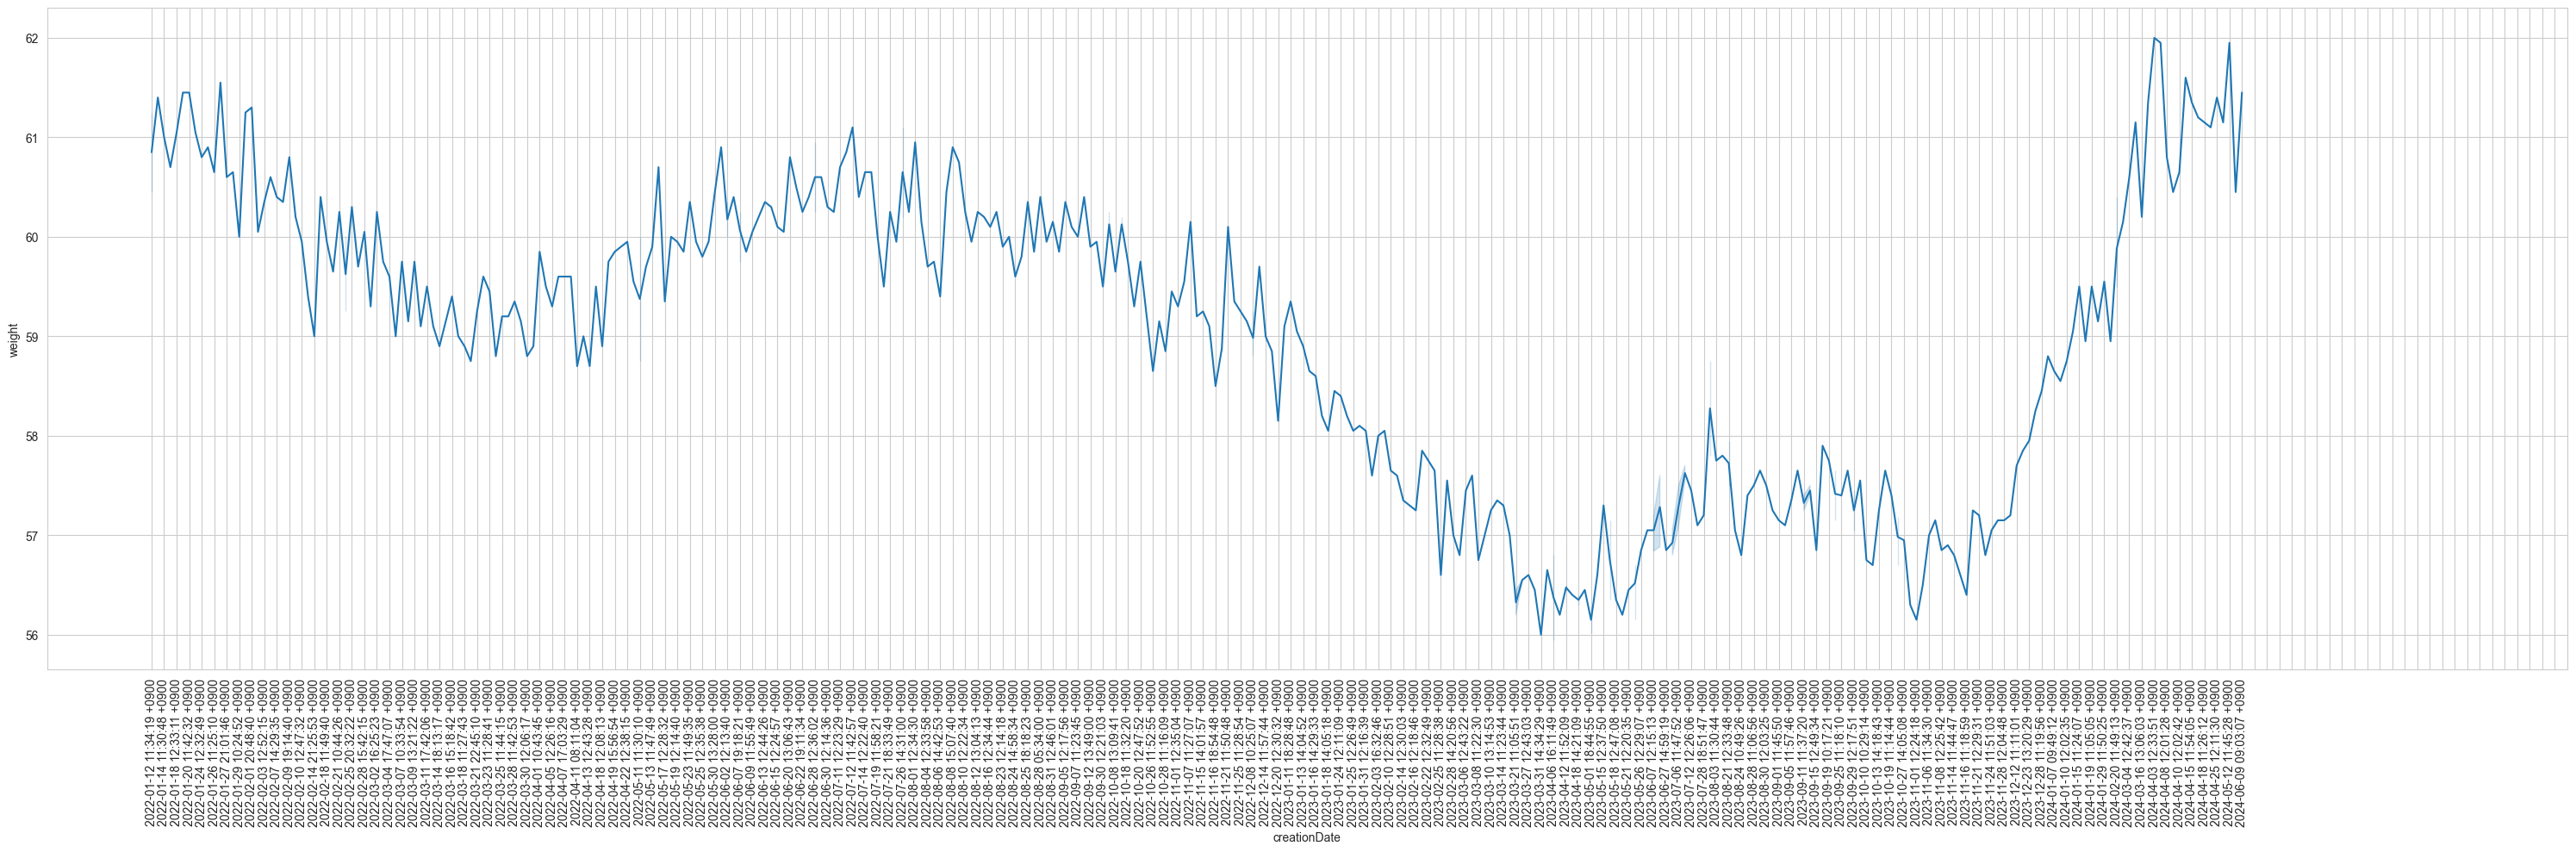

In [9]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=weight_df, x="creationDate", y="weight")
plt.xticks(np.arange(0, len(weight_df), 2), rotation=90)
plt.tight_layout()
plt.show()

# 体脂肪率

In [10]:
# 体脂肪率を可視化
fat_ratio_df = omron_df[omron_df["type"] == "HKQuantityTypeIdentifierBodyFatPercentage"].reset_index(drop=True)
fat_ratio_df["value"] = fat_ratio_df["value"].astype(float)

# %化
fat_ratio_df["value"] = fat_ratio_df["value"] * 100
fat_ratio_df = fat_ratio_df.rename(columns={"value": "fat_ratio"})
fat_ratio_df = fat_ratio_df.drop(columns=["type", "sourceName", "unit"])

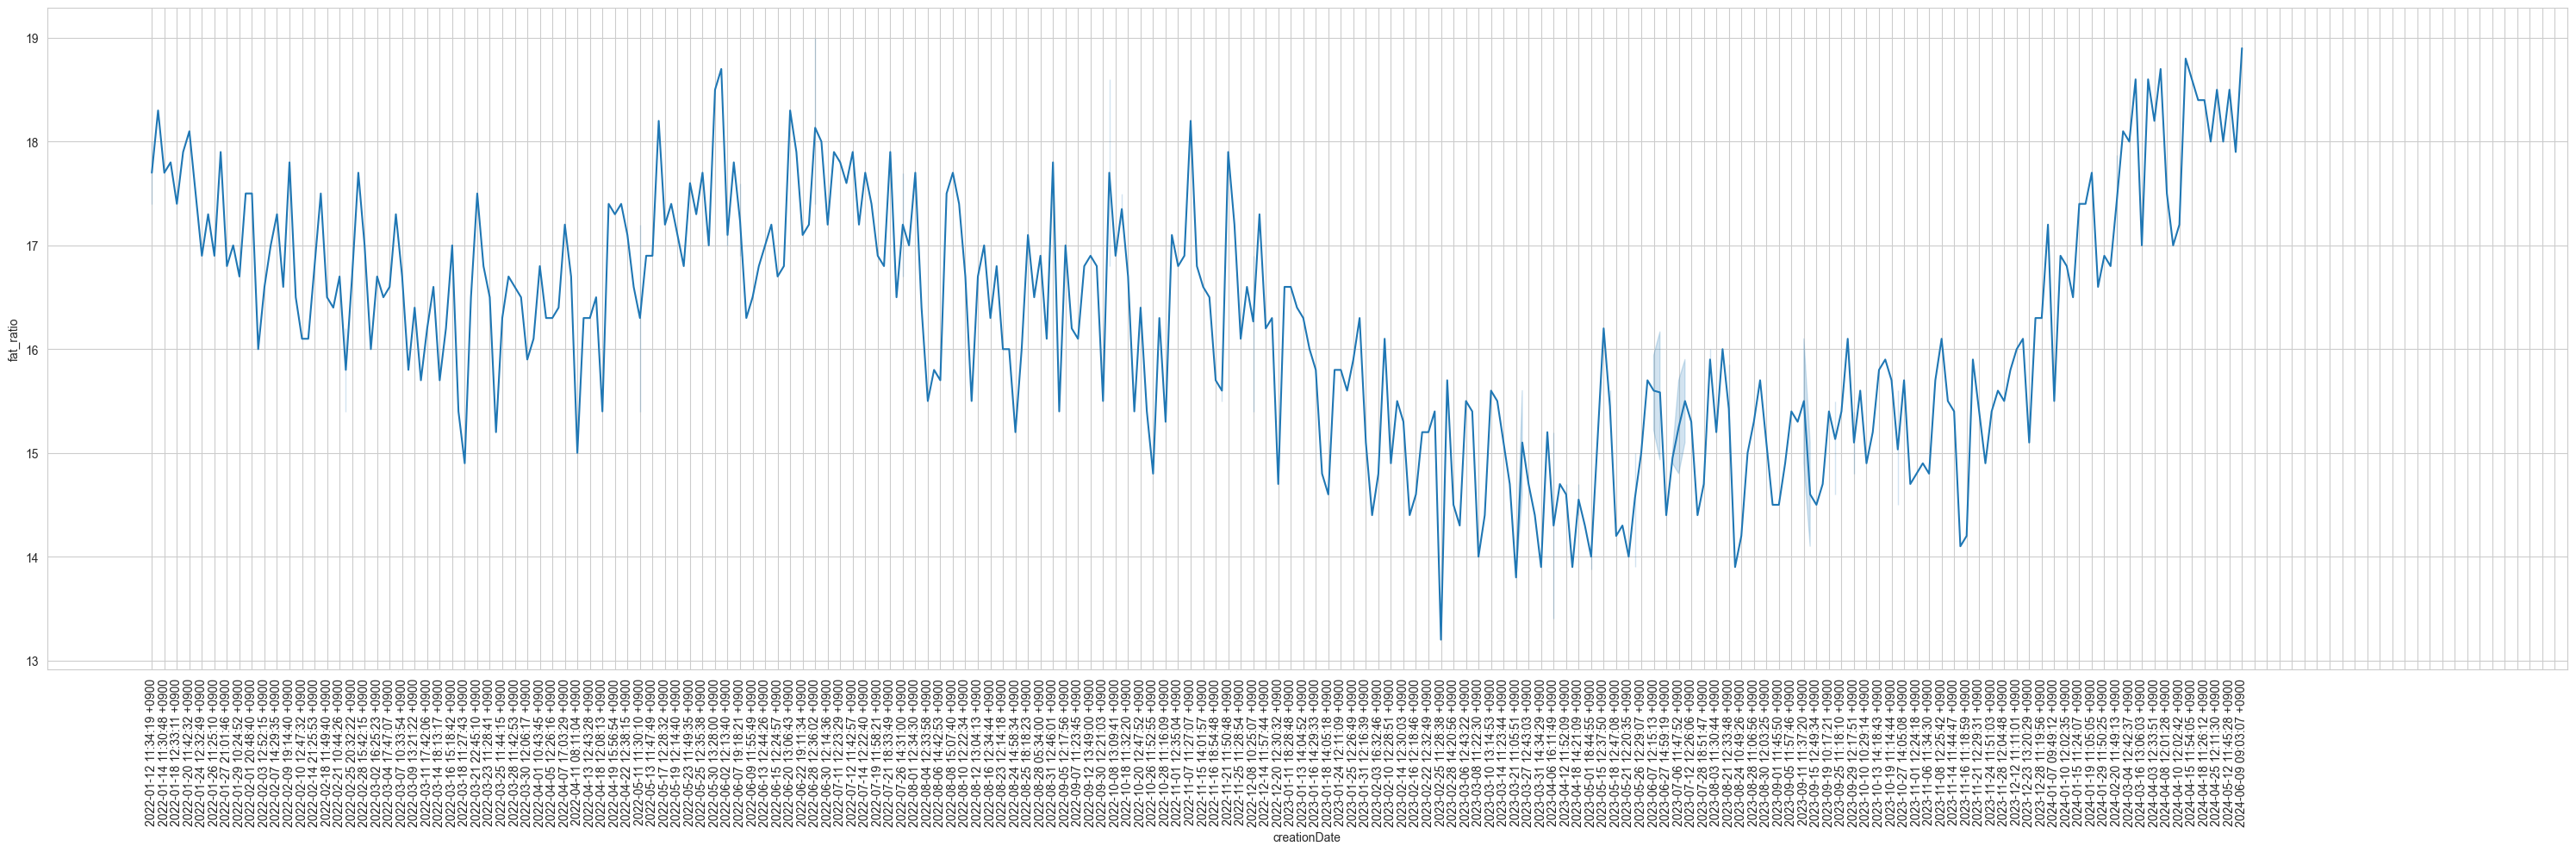

In [11]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=fat_ratio_df, x="creationDate", y="fat_ratio")
plt.xticks(np.arange(0, len(weight_df), 2), rotation=90)
plt.tight_layout()
plt.show()

# 相関見てみる

In [12]:
# オムロン機器は体重と体脂肪率を同時に計測するので、時刻データが一致するはず
merged_df = fat_ratio_df.merge(weight_df, on=["creationDate", "startDate", "endDate"], how="inner")
assert len(merged_df) == len(fat_ratio_df)
assert len(merged_df) == len(weight_df)

In [13]:
merged_df

,creationDate,startDate,endDate,fat_ratio,weight
0,2022-01-12 11:34:19 +0900,2021-12-30 11:36:23 +0900,2021-12-30 11:36:23 +0900,17.4,60.45
1,2022-01-12 11:34:19 +0900,2022-01-12 11:33:20 +0900,2022-01-12 11:33:20 +0900,18.0,61.25
2,2022-01-13 11:25:08 +0900,2022-01-13 11:24:29 +0900,2022-01-13 11:24:29 +0900,18.3,61.40
3,2022-01-14 11:30:48 +0900,2022-01-14 11:30:12 +0900,2022-01-14 11:30:12 +0900,17.7,61.00
4,2022-01-16 12:07:26 +0900,2022-01-16 12:06:10 +0900,2022-01-16 12:06:10 +0900,17.8,60.70
...,...,...,...,...,...
382,2024-04-25 12:11:30 +0900,2024-04-25 12:10:33 +0900,2024-04-25 12:10:33 +0900,18.5,61.40
383,2024-04-29 13:25:53 +0900,2024-04-29 13:25:05 +0900,2024-04-29 13:25:05 +0900,18.0,61.15
384,2024-05-12 11:45:28 +0900,2024-05-12 11:44:20 +0900,2024-05-12 11:44:20 +0900,18.5,61.95
385,2024-06-06 12:11:46 +0900,2024-06-06 12:11:02 +0900,2024-06-06 12:11:02 +0900,17.9,60.45


In [14]:
merged_df[["weight", "fat_ratio"]].corr()

,weight,fat_ratio
weight,1.000000,0.884823
fat_ratio,0.884823,1.000000


<Axes: >

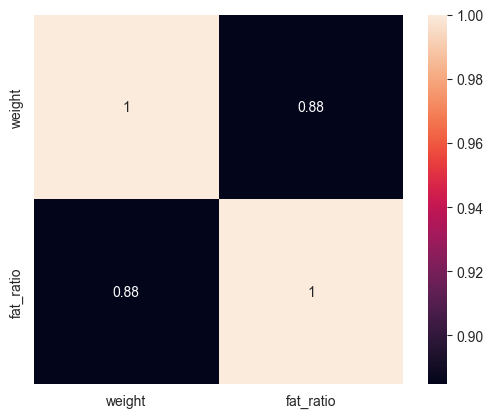

In [15]:
sns.heatmap(merged_df[["weight", "fat_ratio"]].corr(), square=True, annot=True)
